In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("data/thematic_reviews.csv")

In [3]:
df.head()

,review,rating,date,bank,source,sentiment,sentiment_score,clean_review,themes
0,what is this app problem???,1,2025-06-05,CBE,Google Play,negative,0.999623,app problem,other
1,not functional,1,2025-06-05,CBE,Google Play,negative,0.999779,functional,other
2,everytime you uninstall the app you have to re...,1,2025-06-04,CBE,Google Play,negative,0.990516,everytime uninstall app reach physically oldy ...,other
3,yetemeta,1,2025-06-03,CBE,Google Play,positive,0.655366,yetemeta,other
4,it is not safety,1,2025-06-03,CBE,Google Play,negative,0.999787,safety,other


In [5]:
# Group themes by sentiment
grouped = df.groupby(["bank", "themes", "sentiment"]).size().reset_index(name="count")

# Focus on top positive & negative themes per bank
drivers = grouped[grouped["sentiment"] == "positive"].sort_values("count", ascending=False)
pain_points = grouped[grouped["sentiment"] == "negative"].sort_values("count", ascending=False)

# Display top 3 themes for each
for bank in df["bank"].unique():
    print(f"\nTop Drivers for {bank}:\n", drivers[drivers["bank"] == bank].head(3))
    print(f"\nTop Pain Points for {bank}:\n", pain_points[pain_points["bank"] == bank].head(3))



Top Drivers for CBE:
    bank    themes sentiment  count
35  CBE     other  positive    785
21  CBE        UX  positive     47
28  CBE  features  positive     22

Top Pain Points for CBE:
    bank       themes sentiment  count
34  CBE        other  negative    761
27  CBE     features  negative     93
36  CBE  performance  negative     39

Top Drivers for BOA:
    bank   themes sentiment  count
11  BOA    other  positive    375
1   BOA       UX  positive     12
16  BOA  support  positive      5

Top Pain Points for BOA:
    bank       themes sentiment  count
10  BOA        other  negative    426
12  BOA  performance  negative     58
2   BOA       access  negative     26

Top Drivers for Dashen:
       bank    themes sentiment  count
61  Dashen     other  positive    258
49  Dashen        UX  positive     47
54  Dashen  features  positive     12

Top Pain Points for Dashen:
       bank       themes sentiment  count
60  Dashen        other  negative     86
62  Dashen  performance  negat

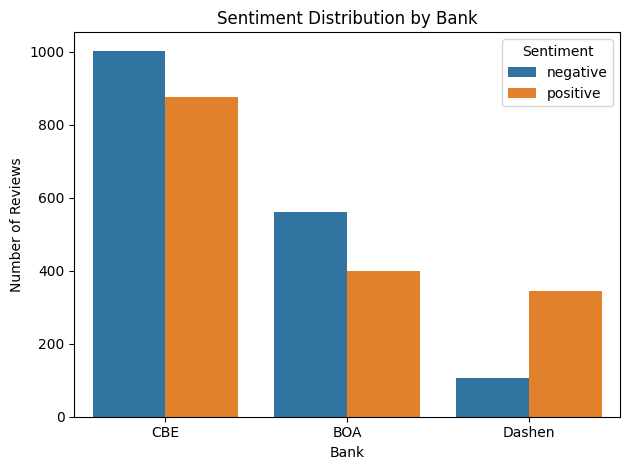

In [8]:
sns.countplot(data=df, x="bank", hue="sentiment")
plt.title("Sentiment Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
